### Notebook to explore SITRACK outputs

In [6]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import HTML

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean

#JUPYTER notebook magics
%matplotlib inline 

* define a function for later use (plotting purposes)

In [2]:
def Fnospines(ax,pspines=False,paxis='off'):
    """
    Remove spines from around the plot
    
    Return: (ax)
    """
    ax.spines['top'].set_visible(pspines)
    ax.spines['right'].set_visible(pspines)
    ax.spines['bottom'].set_visible(pspines)
    ax.spines['left'].set_visible(pspines)
    ax.axis(paxis)

---
## 2. Plot using geographic projection

* Create map over arctic region without data

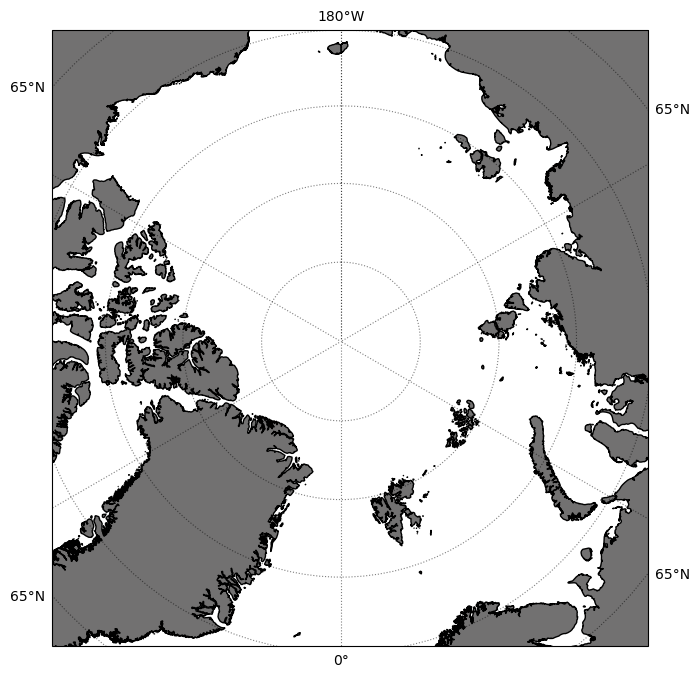

In [3]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([8,8]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use Orthographic projection over Arctic region
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
ax.set_extent([-180, 180, 70, 90], trdata)

# continents
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor='#727171')
#land = cfeature.GSHHSFeature(scale='intermediate',
#                                     levels=[1],
#                                     facecolor=cfeature.COLORS['sea'])
ax.add_feature(land)

# gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')


# Read the seed file

In [4]:
diridat = "/Users/leroux/WORK/DEV/sitrack/tools/nc/"
fili    = "sitrack_seeding_nemoTsi3_19961215_00_HSS5.nc"

seed = xr.open_dataset(diridat+fili)
seed

<xarray.Dataset>
Dimensions:    (time: 1, buoy: 2965)
Coordinates:
  * time       (time) datetime64[ns] 1996-12-15
  * buoy       (buoy) int32 0 1 2 3 4 5 6 ... 2958 2959 2960 2961 2962 2963 2964
Data variables:
    id_buoy    (buoy) int32 ...
    latitude   (time, buoy) float32 ...
    longitude  (time, buoy) float32 ...
    y_pos      (time, buoy) float32 ...
    x_pos      (time, buoy) float32 ...
Attributes:
    Origin:   idealized_seeding
    About:    Lagrangian sea-ice drift
    Author:   Generated with `generate_sidfex_seeding.py` of `sitrack` (L. Br...

# Plot the seeds at initial time

/Users/leroux/anaconda3/envs/jupy/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


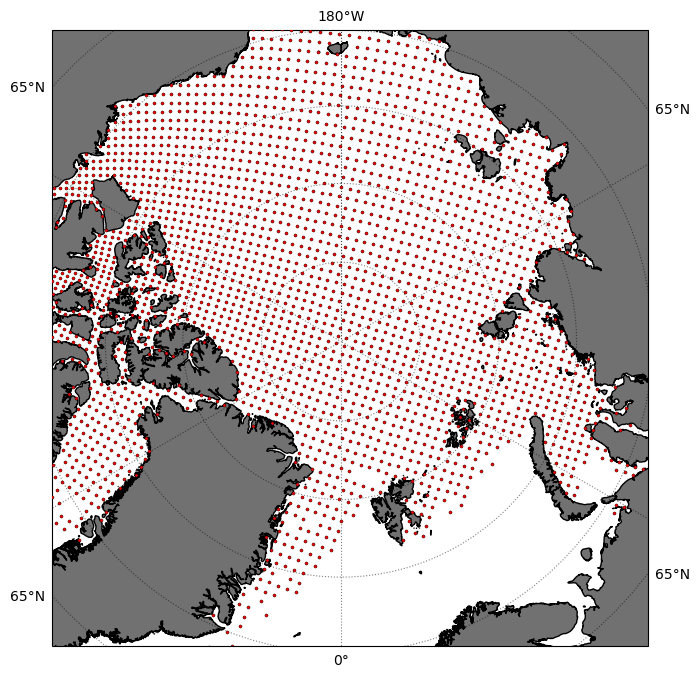

In [5]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([8,8]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use Orthographic projection over Arctic region
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
ax.set_extent([-180, 180, 70, 90], trdata)

# continents
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor='#727171')
#land = cfeature.GSHHSFeature(scale='intermediate',
#                                     levels=[1],
#                                     facecolor=cfeature.COLORS['sea'])
ax.add_feature(land)

# gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')

lonpt=seed.longitude.values
latpt=seed.latitude.values


# plot scattered points (no line in between)
traj=plt.scatter(x=lonpt,
               y=latpt,
               alpha=1, 
               s=20,
            linewidths=0.3,
            marker='.',
            facecolors='r', 
            edgecolors='k',
            transform=trdata,
            cmap='inferno_r',
            zorder=20) 


In [6]:
diridat2 = "/Users/leroux/WORK/DEV/sitrack/nc/"
fili2    = "NEMO-SI3_NANUK4_BBM23U06_tracking_nemoTsi3_idlSeed_19961215h00_19970421h00.nc"

seed = xr.open_dataset(diridat2+fili2)
seed

<xarray.Dataset>
Dimensions:    (time: 3049, buoy: 1002)
Coordinates:
  * time       (time) datetime64[ns] 1996-12-15 ... 1997-04-21
  * buoy       (buoy) int32 0 1 2 3 4 5 6 7 ... 995 996 997 998 999 1000 1001
Data variables:
    id_buoy    (buoy) int32 ...
    latitude   (time, buoy) float32 ...
    longitude  (time, buoy) float32 ...
    y_pos      (time, buoy) float32 ...
    x_pos      (time, buoy) float32 ...
    mask       (time, buoy) int8 ...
Attributes:
    Origin:   NEMO-SI3_NANUK4_BBM23U06
    About:    Lagrangian sea-ice drift
    Author:   Generated with `si3_part_tracker.py` of `sitrack` (L. Brodeau, ...

## Example how to plot nextsim-f sea ice data on map (with geographical projection)

In [3]:
filiICE = "/Users/leroux/WORK/DEV/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm_202311/2024/01/20240119_hr-nersc-MODEL-nextsimf-ARC-b20240111-fv00.0.nc"
ICEdat=xr.open_dataset(filiICE)

In [9]:
ICEdat

<xarray.Dataset>
Dimensions:         (y: 2367, x: 2467, time: 24, nv: 2)
Coordinates:
  * y               (y) float64 -4.3e+06 -4.297e+06 ... 2.795e+06 2.798e+06
  * x               (x) float64 -3.6e+06 -3.597e+06 ... 3.795e+06 3.798e+06
    longitude       (y, x) float64 ...
    latitude        (y, x) float64 ...
  * time            (time) datetime64[ns] 2024-01-19T00:29:59.999999488 ... 2...
Dimensions without coordinates: nv
Data variables:
    stereographic   int8 ...
    time_bnds       (time, nv) datetime64[ns] ...
    siconc          (time, y, x) float64 ...
    sithick         (time, y, x) float64 ...
    sisnthick       (time, y, x) float64 ...
    vxsi            (time, y, x) float64 ...
    vysi            (time, y, x) float64 ...
    sialb           (time, y, x) float64 ...
    siage           (time, y, x) float64 ...
    siconc_my       (time, y, x) float64 ...
    siconc_young    (time, y, x) float64 ...
    si_ridge_ratio  (time, y, x) float64 ...
Attributes:
    Conventions:       CF-1.6
    institution:       NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    source:            neXtSIM model fields
    email:             nextsimf@nersc.no
    title:             neXtSIM-F sea ice forecast, 3 km hourly-averaged field...
    cmems_product_id:  ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011
    field_type:        Files based on file type moorings
    bulletin_type:     Forecast
    forecast_range:    9 days
    field_date:        2024-01-19
    bulletin_date:     2024-01-11
    history:           2024-01-11 11:13:24: cmems_postproc.py ...\n

In [33]:
# make a log color map

In [22]:
# color map field 1
cmap = cmocean.cm.ice
cmap.set_bad('#b0b0b0',1.)
cmap.set_under('k')
cmap.set_over('w')
norm = mcolors.PowerNorm(gamma=4.5,vmin=0.15, vmax=0.99)

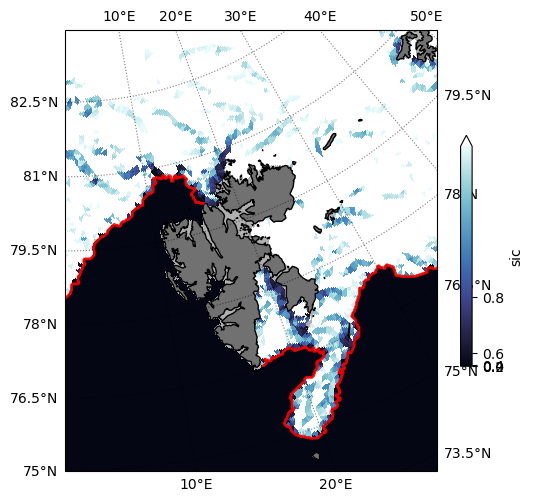

In [32]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([6,6]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use Orthographic projection over Arctic region
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 

ax.set_extent([0, 30, 75, 83], trdata)


# plot field (here it's sea ice concentration)
cs  = plt.pcolormesh(ICEdat.longitude, ICEdat.latitude, ICEdat.siconc.isel(time=1),shading='nearest',cmap=cmap,norm=norm,transform=trdata)

# add a red contour where sea ice concentration is 0.15  (ice edge)
ct = plt.contour(ICEdat.longitude, ICEdat.latitude,ICEdat.siconc.isel(time=1),alpha=0.9,colors='r',linestyles="-",linewidths=2,transform=trdata,levels=np.arange(0.15,0.16,0.15))


# continents
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor='#727171')
#land = cfeature.GSHHSFeature(scale='intermediate',
#                                     levels=[1],
#                                     facecolor=cfeature.COLORS['sea'])
ax.add_feature(land)

# gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')

 # add colorbar
cb = fig3.colorbar(cs,extend='max',aspect=20,shrink=0.5,label='sic')
